In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import re

%matplotlib notebook

In [3]:
patient_df = pd.read_csv("patient_info.csv", error_bad_lines = False, engine = "python")
video_df = pd.read_csv(r"video_watched.csv", error_bad_lines=False, engine = "python")

# EDA of Patient Data

In [4]:
del patient_df['patient_id.1']
del patient_df['user_id']

In [5]:
age = patient_df['age']
sex = patient_df['sex']
time_created = patient_df['datetime_created']
registerd = patient_df['is_registered']
product_teir = patient_df['product_tier']
total_activities = patient_df['total_activities_done']
unique_days_with_activity = patient_df['unique_days_with_activity']

<IPython.core.display.Javascript object>


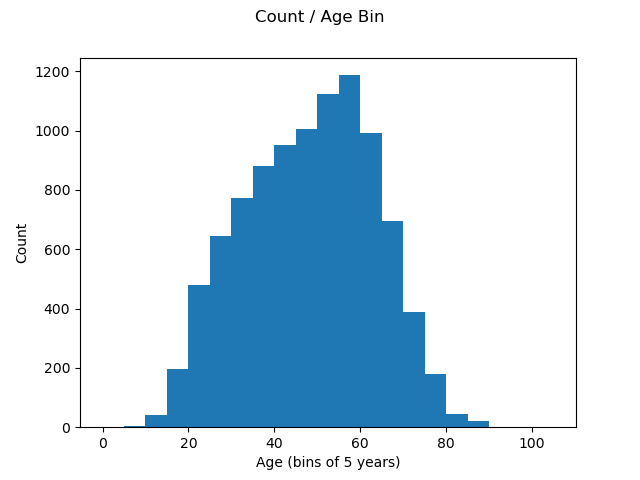

Text(0.5, 0.98, 'Count / Age Bin')

In [6]:
plt.figure()
plt.hist(age, bins = range(0,110,5), label = "age")
plt.xlabel('Age (bins of 5 years)')
plt.ylabel('Count')
plt.suptitle("Count / Age Bin")

<IPython.core.display.Javascript object>


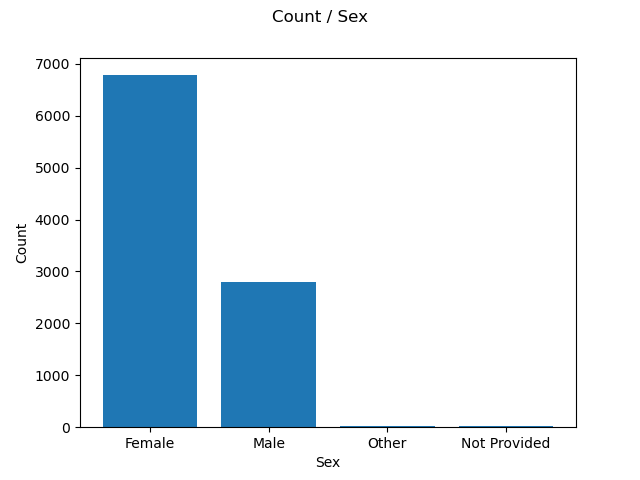

Text(0.5, 0.98, 'Count / Sex')

In [7]:
plt.figure()
plt.bar(sex.value_counts().index, sex.value_counts().values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.suptitle('Count / Sex')

<IPython.core.display.Javascript object>


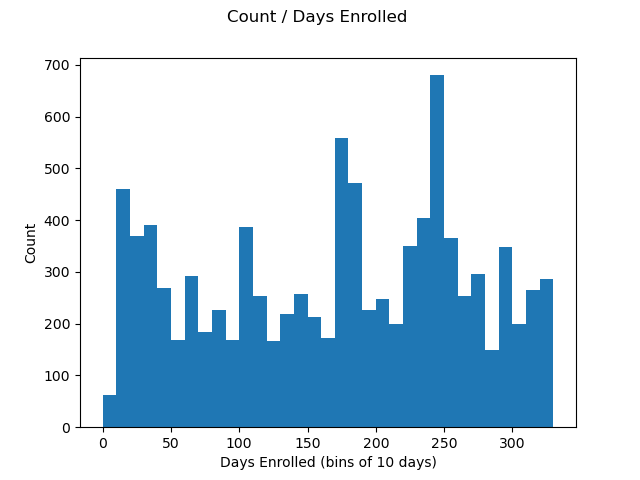

Text(0.5, 0.98, 'Count / Days Enrolled ')

In [8]:
current = date.fromisoformat("2020-11-29")
days_enrolled = time_created.apply(lambda x : int((current - date.fromisoformat(x[0:10])).days))
maxi = int(days_enrolled.describe()['max'])

plt.figure()
plt.hist(days_enrolled, bins = range(0,maxi, 10))
plt.xlabel('Days Enrolled (bins of 10 days)')
plt.ylabel('Count')
plt.suptitle('Count / Days Enrolled ')


In [20]:
registerd.value_counts()

1    9616
0       3
Name: is_registered, dtype: int64

<IPython.core.display.Javascript object>


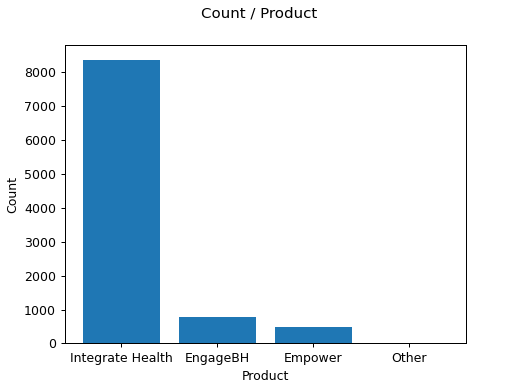

Text(0.5, 0.98, 'Count / Product')

In [24]:
product_teir_count = product_teir.value_counts()
plt.figure()
plt.bar(product_teir_count.index, product_teir_count.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.suptitle('Count / Product')

<IPython.core.display.Javascript object>


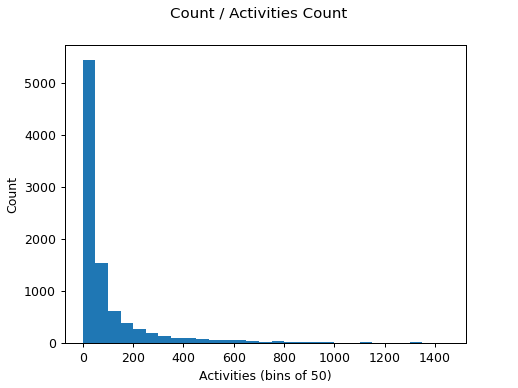

Text(0.5, 0.98, 'Count / Activities Count')

In [43]:
act_max = int(total_activities.describe()['max'])
plt.figure()
plt.hist(total_activities, bins = range(0,1500, 50))
plt.xlabel('Activities (bins of 50)')
plt.ylabel('Count')
plt.suptitle('Count / Activities Count')

<IPython.core.display.Javascript object>


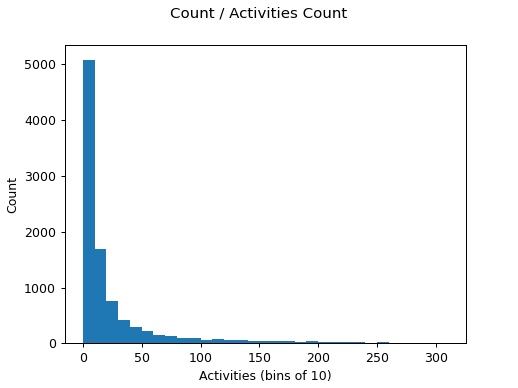

Text(0.5, 0.98, 'Count / Activities Count')

In [42]:
unique_days_with_activity = patient_df['unique_days_with_activity']
unique_days_max = int(unique_days_with_activity.describe()['max'])
plt.figure()
plt.hist(unique_days_with_activity, bins = range(0,unique_days_max, 10))
plt.xlabel('Activities (bins of 10)')
plt.ylabel('Count')
plt.suptitle('Count / Activities Count')

# EDA on Video Data

In [275]:
# pull out video data from video_df (i.e. get unique videos and their data)
video_data = video_df[[ 'video_id', 'url', 'primary_category', 'secondary_category', 'notes', 'description', 'tags', 'length']]

# pull out patient watch data (i.e. video watch events per patient)
patient_watch_data = video_df[['datetime_created', 'id','patient_id', 'homework_id', 'subsection_watched_from']]

In [276]:
video_data = video_data.drop_duplicates()
video_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 110273
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            1023 non-null   int64 
 1   url                 1023 non-null   object
 2   primary_category    203 non-null    object
 3   secondary_category  125 non-null    object
 4   notes               1023 non-null   object
 5   description         798 non-null    object
 6   tags                774 non-null    object
 7   length              1023 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 71.9+ KB


In [277]:
nan_video = video_data.where((video_data['primary_category'].isnull() &
                              video_data['secondary_category'].isnull() &
                              video_data['description'].isnull() &
                              video_data['notes'].isnull()))


nan_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 110273
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            0 non-null      float64
 1   url                 0 non-null      object 
 2   primary_category    0 non-null      object 
 3   secondary_category  0 non-null      object 
 4   notes               0 non-null      object 
 5   description         0 non-null      object 
 6   tags                0 non-null      object 
 7   length              0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 71.9+ KB


From above we can see there are 1023 unique videos which all have a url link. There are many videos that don't have a primary or secondary category. Additionally, there are no videos that don't have at least one of the four - primary category, secondary category, description, or notes.

In [313]:
prim = video_data['primary_category'].value_counts()
sec = video_data['secondary_category'].value_counts()
length = video_data['length']

<IPython.core.display.Javascript object>


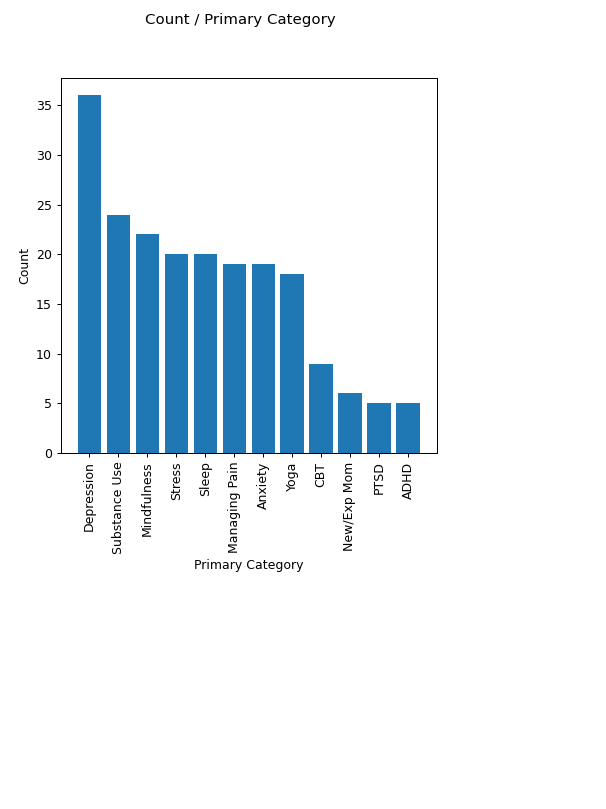

Text(0.5, 0.98, 'Count / Primary Category ')

In [292]:
prim = prim.rename(index = {'Cognitive Behavioral Therapy' : "CBT", 'New & Expecting Mothers' : 'New/Exp Mom'})
plt.figure(figsize = (6,8))
plt.bar(prim.index, prim.values)
plt.xticks(rotation = 90)
plt.gcf().subplots_adjust(bottom = 0.3)

plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.suptitle('Count / Primary Category ')

In [280]:
# change secondary category string to list

video_data['secondary_category'] = video_data['secondary_category'].fillna("['']")
video_data['secondary_category'] = video_data['secondary_category'].apply(lambda x : re.findall("(?<=')[\w\s&]+(?=')", x))

<IPython.core.display.Javascript object>


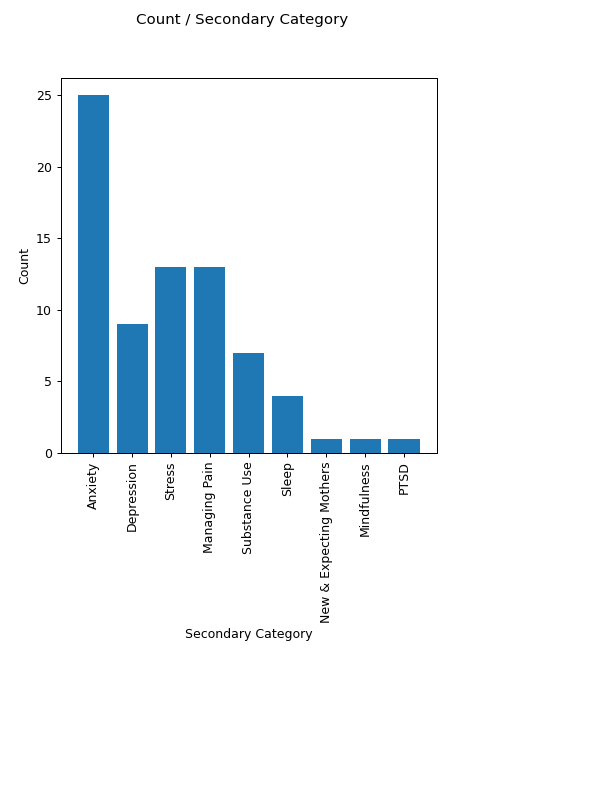

Text(0.5, 0.98, 'Count / Secondary Category')

In [293]:
### PLOT SECONDARY CATEGORY COUNTS ###
# secondary categories are list themselves - find unique values.
secondary_categories = []

for index in sec.index:
   
    index = re.findall("(?<=')[\w\s&]+(?=')", index)
    
    for category in index:
        if(category not in secondary_categories):
            secondary_categories.append(category)

# count how many times each is use
# create dataframe indecies are the category values, values will be the count
secondary_cat_count_df = pd.DataFrame(index = secondary_categories, columns = ["count"]).fillna(0)

secondary_count_data = video_data['secondary_category']

# loop through 
for (ind, item) in secondary_count_data.iteritems():
    for cat in item:
        current_count = secondary_cat_count_df.at[cat, "count"]
        new_count = current_count + 1
        secondary_cat_count_df.at[cat, "count"] = new_count

        
plt.figure(figsize = (6,8))
plt.bar(secondary_cat_count_df.index, secondary_cat_count_df['count'])
plt.xticks(rotation = 90)
plt.gcf().subplots_adjust(bottom = 0.3)

plt.xlabel('Secondary Category')
plt.ylabel('Count')
plt.suptitle('Count / Secondary Category')




<IPython.core.display.Javascript object>


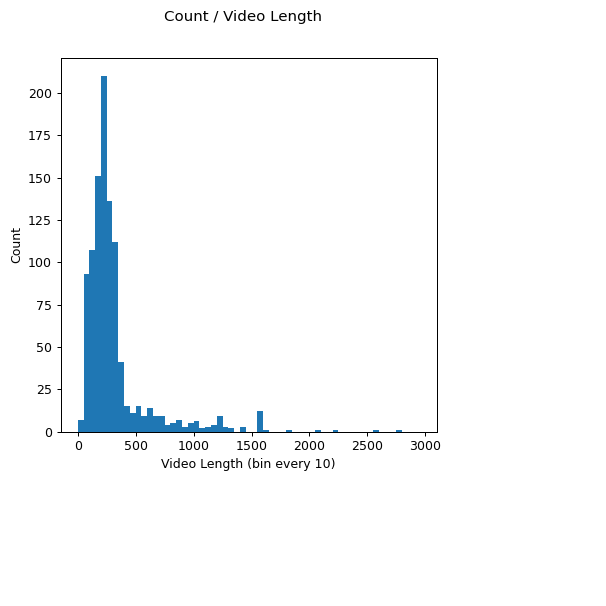

Text(0.5, 0.98, 'Count / Video Length')

In [316]:
plt.figure(figsize = (6,6))
plt.hist(video_data['length'], bins = range(0,3000,50))
plt.xlabel('Video Length (bin every 10)')
plt.ylabel('Count')
plt.suptitle('Video Length Histogram')

In [312]:
video_data['length'].describe()

count     1023.000000
mean       432.702835
std       1668.865228
min         31.000000
25%        174.000000
50%        238.000000
75%        319.500000
max      39618.000000
Name: length, dtype: float64

In [10]:
watch_cnt = video_df[['patient_id', 'video_id']].value_counts()
watch_cnt.describe()
# videos are on average not watch many times but there are some very large values

count    84502.000000
mean         1.313969
std          1.495749
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        139.000000
dtype: float64